In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [27]:
def count_subsignal(ti_seq, M0, T1):
    # abs(M0_j * (1 - 2*exp(-TI/T1_j)))
    return M0 * np.abs((1 - 2 * np.exp(- ti_seq / T1)))

def count_signal_in_voxel(M0s, T1s):
    ti_seq = np.array([*list(range(50, 400, 25)),
                       *list(range(400, 1000, 10)),
                       1000, 1030, 1050, 1080, 1100, 1130, 1150, 1180, 1200, 1230, 1250, 1280, 1300, 1330, 1350, 1380,
                       1400, 1450, 1500, 1550, 1600, 1650, 1700,
                       1800, 1900, 2000, 2100, 2200, 2300, 2500, 3000], dtype=float)

    model = np.zeros_like(ti_seq)

    for i in range(min(len(M0s), len(T1s))):
        model += count_subsignal(ti_seq, M0s[i], T1s[i])

    return model

ti_seq = [*list(range(50, 400, 25)),
          *list(range(400, 1000, 10)),
          1000, 1030, 1050, 1080, 1100, 1130, 1150, 1180, 1200, 1230, 1250, 1280, 1300, 1330, 1350, 1380,
          1400, 1450, 1500, 1550, 1600, 1650, 1700,
          1800, 1900, 2000, 2100, 2200, 2300, 2500, 3000]

model = tf.keras.models.load_model("tf_softplus",
                                   custom_objects=None,
                                   compile=True)
mse = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

In [34]:
def fun_iter(pars):
    # pars[i]     - M0_i
    # pars[i + 1] - T1_i
    assert len(pars) % 2 == 0

    m0s = pars[::2]
    t1s = pars[1::2]
    duplicity = 64
    sigs = np.zeros((duplicity, 105), dtype=float)
    for i in range(duplicity):
        sigs[i] = count_signal_in_voxel(m0s, t1s) + np.random.normal(0, 10, 105)
    pred = model.predict(sigs)
    vars = [32, 63]
    return sum([sum(((sigs[i] - pred[i]) / np.max(sigs[i])) ** 2) / 105 for i in range(duplicity)]) / duplicity
    #return sum([mse(sigs[i], pred[i]).numpy() for i in range(duplicity)]) / duplicity

def show_error():
    for m0 in range(800, 2001, 200):
        errors = [fun_iter([m0, t1]) for t1 in range(300, 2000, 20)]
        plt.plot(range(300, 2000, 20), errors, label="M0 = {}".format(m0))

    plt.legend()
    plt.xlim((600, 2000))
    plt.ylim((0.0002, 0.001))
    plt.show()

Závislosť chyby od T1 relaxačného času pre rôzne M0.

Relu

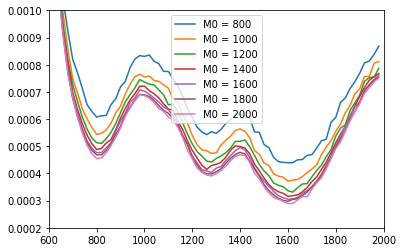

In [38]:
model = tf.keras.models.load_model("tf_relu",
                                   custom_objects=None,
                                   compile=True)
show_error()

Gelu

In [39]:
model = tf.keras.models.load_model("tf_gelu",
                                   custom_objects=None,
                                   compile=True)
show_error()


Elu

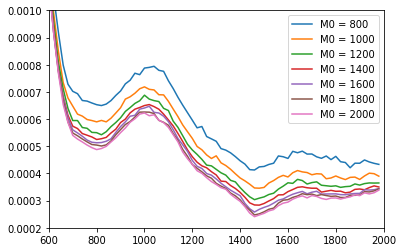

In [40]:
model = tf.keras.models.load_model("tf_elu",
                                   custom_objects=None,
                                   compile=True)
show_error()

Softplus

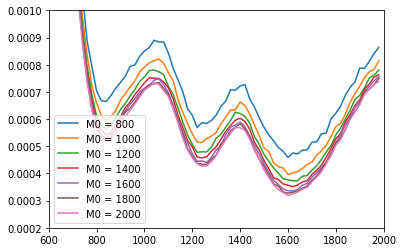

In [41]:
model = tf.keras.models.load_model("tf_softplus",
                                   custom_objects=None,
                                   compile=True)
show_error()


Linear

In [42]:
model = tf.keras.models.load_model("tf_lin",
                                   custom_objects=None,
                                   compile=True)
show_error()

800
1000
1200
1400
1600
1800
2000


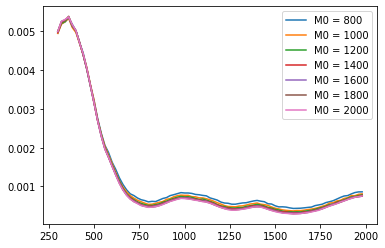

In [20]:
for m0 in range(800, 2001, 200):
    errors = [fun_iter([m0, t1]) for t1 in range(300, 2000, 20)]
    plt.plot(range(300, 2000, 20), errors, label="M0 = {}".format(m0))
    print(m0)

plt.legend()
plt.show()





